In [4]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd

In [6]:
URL = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
lists = pd.read_html(URL)

In [164]:
df = lists[0]


In [21]:
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])

In [163]:
# How many months exist on Mars?


df.groupby(pd.Grouper(key='terrestrial_date', freq='M')).count()



,id,sol,ls,month,min_temp,pressure,month_year,year
terrestrial_date,,,,,,,,
2012-08-31,13,13,13,13,13,13,13,13
2012-09-30,28,28,28,28,28,28,28,28
2012-10-31,30,30,30,30,30,30,30,30
2012-11-30,29,29,29,29,29,29,29,29
2012-12-31,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...
2017-10-31,30,30,30,30,30,30,30,30
2017-11-30,29,29,29,29,29,29,29,29
2017-12-31,31,31,31,31,31,31,31,31


There are 6 Martian months per Earth year. 
There was a total of 35 Martian months and 67 Earth months of data collected.

In [71]:
#Detailed Date Columns 

df['month_year'] = pd.to_datetime(df['terrestrial_date']).dt.to_period('M')
df['year'] = pd.to_datetime(df['terrestrial_date']).dt.to_period('Y')

,id,terrestrial_date,sol,ls,month,min_temp,pressure,month_year,year
0,2,2012-08-16,10,155,6,-75.0,739.0,2012-08,2012
1,13,2012-08-17,11,156,6,-76.0,740.0,2012-08,2012
2,24,2012-08-18,12,156,6,-76.0,741.0,2012-08,2012
3,35,2012-08-19,13,157,6,-74.0,732.0,2012-08,2012
4,46,2012-08-20,14,157,6,-74.0,740.0,2012-08,2012
...,...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2018-02,2018
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018-02,2018
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2018-02,2018
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2018-02,2018


In [76]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

df["min_temp"].count()

1867

There are 1867 Martian days worth of data in this scraped dataset. 

Text(0, 0.5, 'Temp in Celsius')

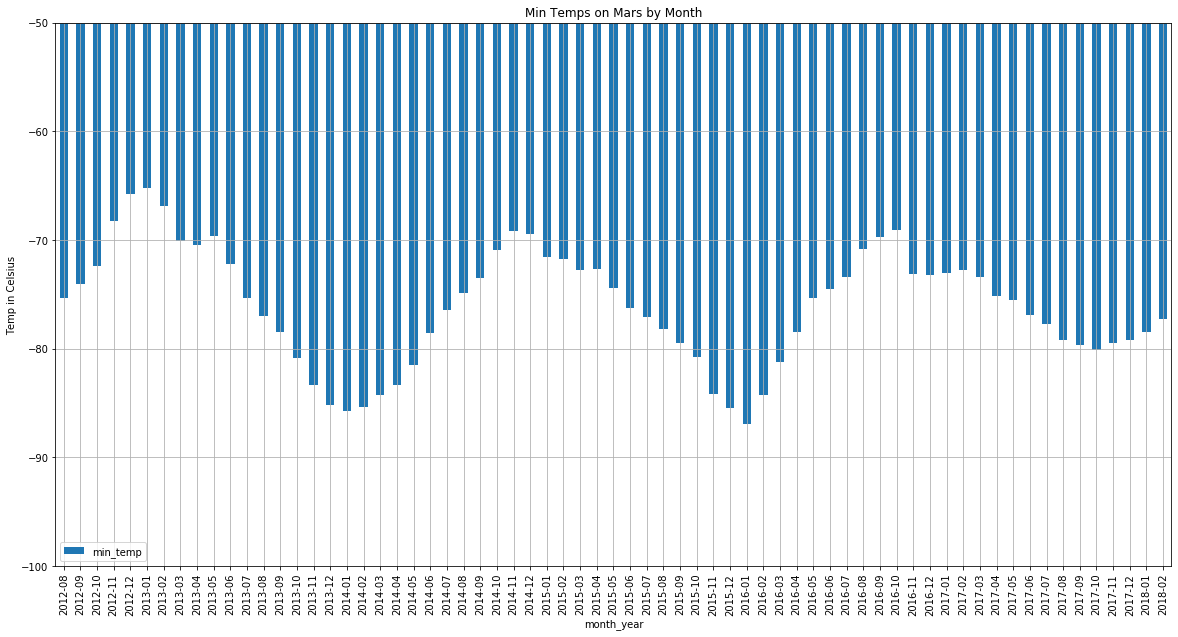

In [158]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?

temp_avg = df.groupby(["month_year"])["min_temp"].mean()

temp_avg_df = pd.DataFrame(temp_avg)

reset = temp_avg_df.reset_index()


# Plot the results as a bar chart.

chart = reset.plot(kind="bar", x="month_year", y="min_temp", rot=90, figsize=(20,10),ylim=(-100,-50), grid=True,title= "Min Temps on Mars by Month")
chart.set_ylabel("Temp in Celsius")



The average coldest month on Mars (in Earth month/year) is January of 2016 at -86.966667 degrees Celsius. The average warmest month on Mars (in Earth month/year) is January of 2013 at -65.193548 degrees Celsius.



Text(0, 0.5, 'Average Atmospheric Pressue')

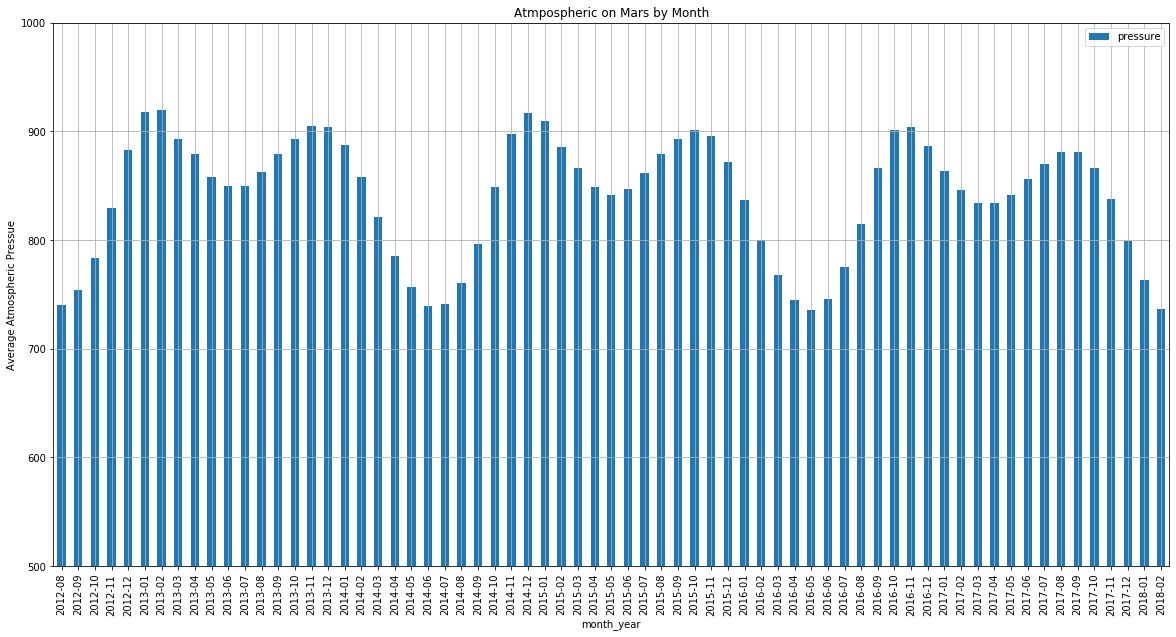

In [150]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

atm_avg = df.groupby(["month_year"])["pressure"].mean()

atm_avg_df = pd.DataFrame(atm_avg)

reset = atm_avg_df.reset_index()

chart = reset.plot(kind="bar", x="month_year", y="pressure", rot=90, figsize=(20,10), ylim=(500,1000), grid=True,title= "Atmpospheric on Mars by Month")
chart.set_ylabel("Average Atmospheric Pressue")

The Earth month that had the lowest average atmoshperic pressure on Mars is May 2016 at 735.366667. The Earth month that had the highest average atmoshperic pressure on Mars is December 2014 at 916.733333.

Text(0.5, 0, 'Earth Year')

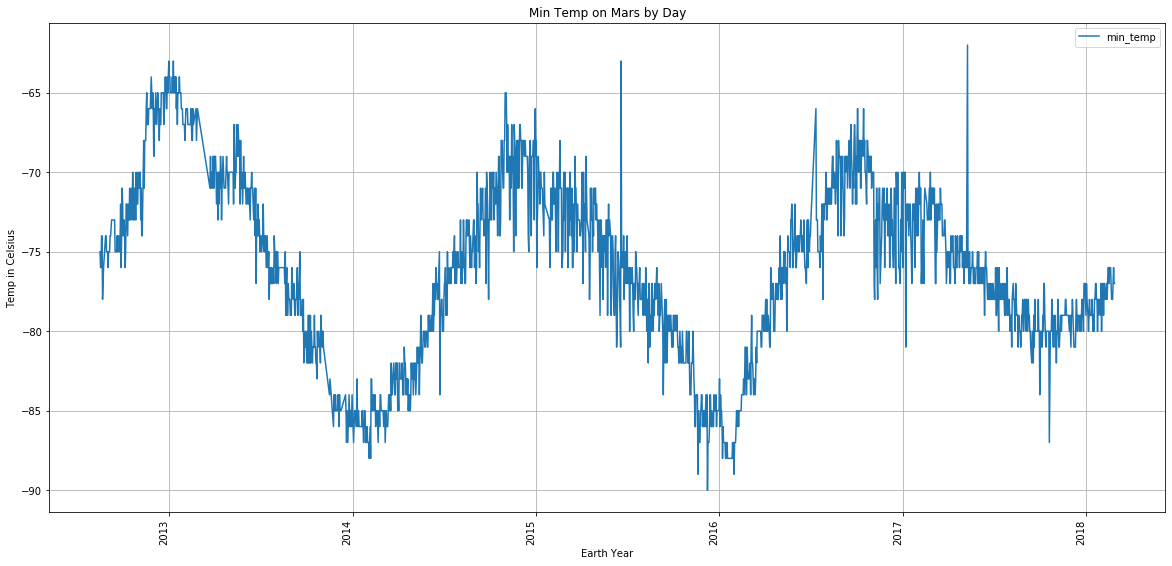

In [129]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature

reduced_df= df[["terrestrial_date","month","min_temp"]]


chart = reduced_df.plot(kind="line", x="terrestrial_date", y="min_temp", rot=90, figsize=(20,10), grid=True,title= "Min Temp on Mars by Day")
chart.set_ylabel("Temp in Celsius")
chart.set_xlabel("Earth Year")


There are about 2 years (~700) Earth Days in one Martian Year approxomated by the above weather graph. 

In [167]:
#Export
df.to_csv('MarsData.csv')